## Setup

In [2]:
%matplotlib widget

from pyCascade import probePost, physics
from matplotlib import pyplot as plt
import numpy as np

category =  "single_family"


In [3]:
############ CLUSTER ################
scratch_dir = '/scratch/users/nbachand/Cascade/city_block_cfd'
home_dir = '/home/users/nbachand/Cascade/city_block_cfd'

# ########### LOCAL ###################
# home_dir = '/home/nbachand/Documents/Cascade/city_block'
# scratch_dir = home_dir

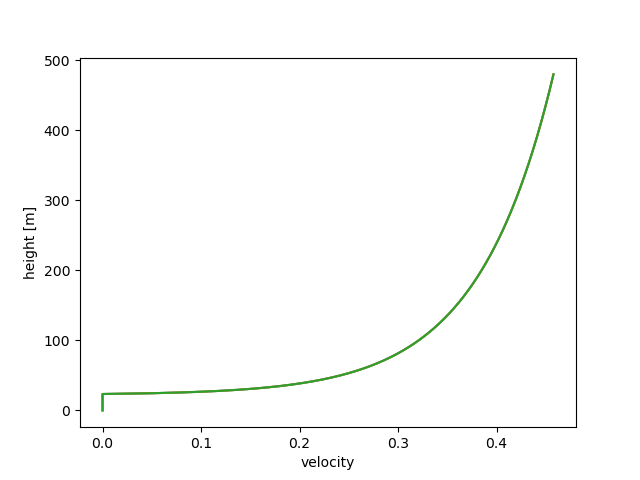

In [4]:
rho = 1.225
mu = 1.7894e-5
Re_tau = 43300
Lz =  480
hm = 20
fric_vel = Re_tau*mu/(hm*rho)

z_0 = 0.061*hm #used for convention, but really y_0
disp = 1.11*hm
shear_vel = fric_vel*np.sqrt(1-disp/Lz)
vK_const = 0.4

LES_params = {
    'uStar': shear_vel,
    'z0': z_0,
    'disp': disp,
    'vK_const': vK_const,
    'Dt': .0675,
    'z_values' : np.linspace(0,Lz,Lz*10),
}
physics_setup = physics.LES_Physics(LES_params)
physics_setup.plot_log_wind()

# checking against charles code
# approximate log law mean profile
y_scaled = (LES_params['z_values']-disp)/z_0
y_scaled = np.maximum(1.0, y_scaled)
ux = (shear_vel/vK_const)*np.log(y_scaled)

# physics_setup.plot_log_wind()

plt.plot(ux, LES_params['z_values'])
plt.plot(physics_setup.LES_params['log_wind'], LES_params['z_values'])

In [5]:
physics_setup.calc_flatplate_quantities(
    rho = 1.224,
    mu = 1.7894e-5,
    yPlus = 500
    )


U infinity is 0.4576822466967725 with L = 480.0
flat plate Reynolds number is 15027242.29234871
wall spacing is 0.4560311528641152 for y+ of 500


In [6]:
physics_setup.LES_params['uStar']
physics_setup.LES_params['z_values'][330]
physics_setup.LES_params['log_wind'][330]



0.16842565916900132

In [7]:
velocity_scaling = 1/physics_setup.LES_params['log_wind'][330]
ventilation_scaling = velocity_scaling/(2.5**2)
                                        
norm_vel = lambda data_df : data_df*velocity_scaling
norm_vent = lambda data_df : data_df*ventilation_scaling

# Run Setup

In [8]:
run = 7
qois = ['comp(u,0)']

probes = probePost.Probes(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/probesOut')
probes.get_locations(f'{scratch_dir}/CHARLES/{category}/R{run}/probes/locations')

In [9]:
# ## 10 m flow statistics
# ref_flow = probes.statistics(
#     names = [name for name in  probes.probe_names if "col" in name], 
#     steps = probes.probe_steps[-10000:-1:1],
#     quants = ['comp(u,0)','comp(u,2)' ],
#     stack = probes.probe_stack[33],
#     processing = [probePost.time_average],
#     parrallel=True
#     )

In [10]:
# ref_flow.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/10m_flow')

slicing took 0 seconds
INFO: Pandarallel will run on 24 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 147 seconds
memorizing data took 4 seconds
processing data took 0 seconds
plotting took 47 seconds


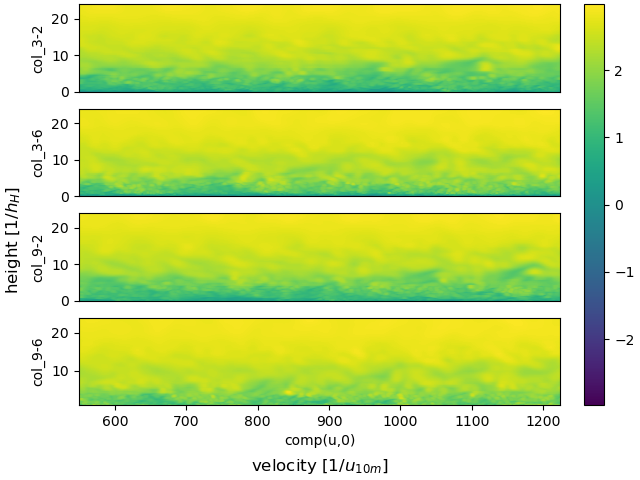

In [11]:
norm_data = lambda data_df : data_df*ventilation_scaling

plot_params = {
    'plot_levels' : {
        # 'comp(u,0)' : np.linspace(0,.5,256),
        # 'comp(u,2)' : np.linspace(-1,1,256)
    },
    'horizontal spacing' : physics_setup.LES_params['Dt'],
    'stack span' : 'y',
    'xlabel': 'velocity $[1/u_{10m}]$',
    'ylabel' : r'height $[1/h_H]$',
    'ColorNorm': 'Centered',
    'veritcal scaling' : 1/20
}

# slice = probes.slice_into_df(slice_params)
(fig, ax) = probes.contour_plots(
    names = [name for name in  probes.probe_names if "col" in name], 
    steps = probes.probe_steps[-10000:-1:1],
    quants = ['comp(u,0)'],#'comp(u,1)','comp(u,2)'],
    parrallel = True,
    plot_params = plot_params,
    processing = [norm_vel]
    )

In [11]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/velocity_history')

In [12]:
# probes.profile_plots(
#     names = [name for name in  probes.probe_names if "col" in name], 
#     steps = probes.probe_steps[-10000:-1],
#     quants = qois,
#     # stack = np.arange(0,300),
#     plot_params = {
#         'stack span' : 'y',
#         'xlabel': 'velocity $[1/u_{10m}]$',
#         'ylabel' : r'height $[1/h_H]$',
#         'veritcal scaling' : 1/20
#         },
#     parrallel=True,
#     processing = [norm_vel, probePost.time_average]
#     )

# plt.plot(norm_vel(physics_setup.LES_params['log_wind']), LES_params['z_values']/20)

In [13]:
# plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/velocity_profile')

In [14]:
# probes.probe_stack

## X flow

slicing took 0 seconds
INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 34 seconds
memorizing data took 0 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:368: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds
slicing took 0 seconds
reading data took 0 seconds
memorizing data took 0 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:425: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds
slicing took 0 seconds
reading data took 0 seconds
memorizing data took 0 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:425: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds
slicing took 0 seconds
reading data took 0 seconds
memorizing data took 0 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:425: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds


name,xwindow_0-0,xwindow_0-1,xwindow_2-0,xwindow_2-1
var,,,,
"comp(u,0)",0.047521,0.077577,0.049718,0.051176


name,xwindow_0-0,xwindow_0-1,xwindow_2-0,xwindow_2-1
var,,,,
"comp(u,0)",0.005471,0.011281,0.011262,0.010468


name,xwindow_0-0,xwindow_0-1,xwindow_2-0,xwindow_2-1
var,,,,
"comp(u,0)",0.069697,0.103597,0.097643,0.093257


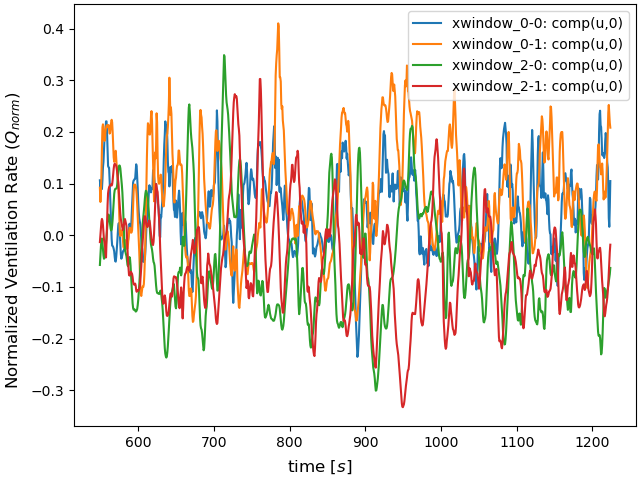

In [13]:
start = -10000
stop = -1
by = 10

norm_norm = lambda df : probePost.mul_names(df, ['xwindow_2-0', 'xwindow_2-1'], -1)

(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : physics_setup.LES_params['Dt'],
        },
    processing = [norm_vent, probePost.ClenshawCurtis_Quadrature, norm_norm],
    parrallel=True
    )

## mean statistics
x_mean = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.ClenshawCurtis_Quadrature, probePost.time_average],
    parrallel=False
    )

## rms statistics
x_rms = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.ClenshawCurtis_Quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
abs_values = lambda df : df.abs()
x_net = probes.statistics(
    names = [name for name in  probes.probe_names if "xwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,0)'],
    processing = [norm_vent, probePost.ClenshawCurtis_Quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(x_mean)
display(x_rms)
display(x_net)

In [14]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/xwindows')

x_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xmean.csv')
x_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xrms.csv')
x_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/xnet.csv')

## Z flow

slicing took 0 seconds
INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


reading data took 31 seconds
memorizing data took 1 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:368: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds
slicing took 0 seconds
reading data took 0 seconds
memorizing data took 1 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:425: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds
slicing took 0 seconds
reading data took 0 seconds
memorizing data took 1 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:425: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds
slicing took 0 seconds
reading data took 0 seconds
memorizing data took 1 seconds


/home/groups/gorle/codes/pyCascade/pyCascade/probePost.py:425: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  data = data.loc[(stack,quants),:]


processing data took 0 seconds


name,zwindow_0-0,zwindow_0-1,zwindow_1-0,zwindow_1-1,zwindow_2-0,zwindow_2-1
var,,,,,,
"comp(u,2)",-0.12202,0.075968,-0.031939,-0.004374,0.063496,-0.078724


name,zwindow_0-0,zwindow_0-1,zwindow_1-0,zwindow_1-1,zwindow_2-0,zwindow_2-1
var,,,,,,
"comp(u,2)",0.01044,0.019337,0.012514,0.011768,0.014496,0.008483


name,zwindow_0-0,zwindow_0-1,zwindow_1-0,zwindow_1-1,zwindow_2-0,zwindow_2-1
var,,,,,,
"comp(u,2)",0.141106,0.132453,0.089503,0.084644,0.115229,0.101644


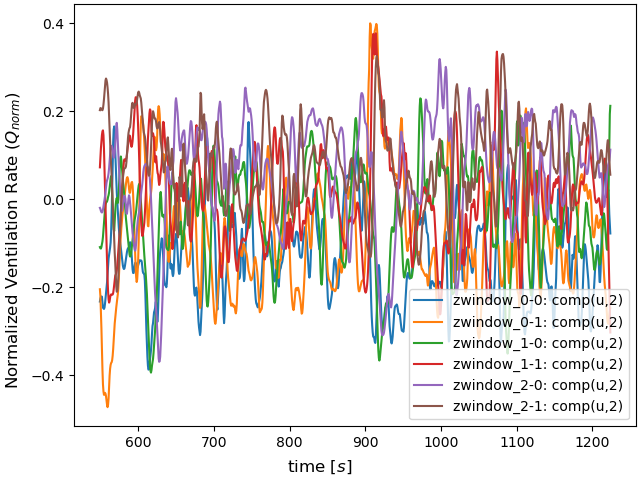

In [9]:
start = -10000
stop = -1
by = 10


norm_norm = lambda df : probePost.mul_names(df, ['zwindow_0-1', 'zwindow_1-1', 'zwindow_2-1'], -1)


(fig, ax) = probes.time_plots(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    plot_params = {
        'stack span' : 'y',
        'ylabel': 'Normalized Ventilation Rate ($Q_{norm}$)',
        'xlabel' : 'time $[s]$',
        'horizontal spacing' : physics_setup.LES_params['Dt'],
        },
    processing = [norm_vent, probePost.ClenshawCurtis_Quadrature, norm_norm],
    parrallel=True
    )

## mean statistics
z_mean = ventilation_scaling * probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.ClenshawCurtis_Quadrature, probePost.time_average],
    parrallel=False
    )

## rms statistics
z_rms = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.ClenshawCurtis_Quadrature, probePost.time_rms],
    parrallel=False
    )

## Net flow
abs_values = lambda df : df.abs()
z_net = probes.statistics(
    names = [name for name in  probes.probe_names if "zwindow" in name], 
    steps = probes.probe_steps[start:stop:by],
    quants = ['comp(u,2)'],
    processing = [norm_vent, probePost.ClenshawCurtis_Quadrature, abs_values, probePost.time_average],
    parrallel=False
    )

display(z_mean)
display(z_rms)
display(z_net)

In [12]:
plt.savefig(f'{home_dir}/CHARLES/{category}/R{run}/plots/zwindows')

z_mean.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zmean.csv')
z_rms.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/zrms.csv')
z_net.to_csv(f'{home_dir}/CHARLES/{category}/R{run}/tables/znet.csv')